## Relationship between housing prices, housing loan rates and exchange rates
## Burçak Aysen Kalmuk

In this project, the goal is to observe the relationship between the increase in housing prices and the Euro/Tl exchange rate and, accordingly, the change in the interest rates of housing loans. After the aggressive increase in foreign exchange in Turkey, house purchases became difficult for the public. For this reason, the question of whether it still makes sense to buy a house by taking a loan is being investigated in this project.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
path = os.path.expanduser("~/Desktop/HW2/")

First I pulled the data and only the relevant columns.

In [2]:
euro_df = pd.read_excel( path+"euro.xlsx", nrows=151 )
konut_df = pd.read_excel( path+"konut.xlsx", nrows=145 )
kredi_df = pd.read_excel( path+"kredi.xlsx", nrows=145 )

konut_df = konut_df[["Tarih","Konut Düzey"]]
konut_df.head(121)

,Tarih,Konut Düzey
0,2012-01,51.7
1,2012-02,52.5
2,2012-03,53.0
3,2012-04,53.6
4,2012-05,54.3
...,...,...
116,2021-09,198.9
117,2021-10,210.2
118,2021-11,229.2
119,2021-12,247.4


In [3]:
euro_df = euro_df[["Tarih","Euro Düzey"]]
euro_df.head(121)

,Tarih,Euro Düzey
0,2012-01,2.383768
1,2012-02,2.325767
2,2012-03,2.361768
3,2012-04,2.354530
4,2012-05,2.316350
...,...,...
116,2021-09,10.046641
117,2021-10,10.620435
118,2021-11,12.033050
119,2021-12,15.317122


In [4]:
kredi_df = kredi_df[["Tarih","Kredi"]]
kredi_df.head(121)

,Tarih,Kredi
0,2012-01,14.5000
1,2012-02,13.9275
2,2012-03,13.3080
3,2012-04,13.0550
4,2012-05,12.7525
...,...,...
116,2021-09,17.8950
117,2021-10,17.8200
118,2021-11,17.0975
119,2021-12,17.3080


Then the data has been merged.

In [5]:
merge_euro_konut_df = euro_df.merge(konut_df, how="inner", on="Tarih")
merge_euro_konut_kredi_df = merge_euro_konut_df.merge(kredi_df, how="inner", on="Tarih")
merge_euro_konut_kredi_df = merge_euro_konut_kredi_df[["Tarih", "Konut Düzey", "Kredi", "Euro Düzey"]]
merge_euro_konut_kredi_df.head(121)

,Tarih,Konut Düzey,Kredi,Euro Düzey
0,2012-01,51.7,14.5000,2.383768
1,2012-02,52.5,13.9275,2.325767
2,2012-03,53.0,13.3080,2.361768
3,2012-04,53.6,13.0550,2.354530
4,2012-05,54.3,12.7525,2.316350
...,...,...,...,...
116,2021-09,198.9,17.8950,10.046641
117,2021-10,210.2,17.8200,10.620435
118,2021-11,229.2,17.0975,12.033050
119,2021-12,247.4,17.3080,15.317122


In [6]:
merge_df = merge_euro_konut_kredi_df
# Shortened the name

In [7]:
merge_df.describe()

,Konut Düzey,Kredi,Euro Düzey
count,121.000000,121.000000,121.000000
mean,101.696694,13.958058,4.962233
std,42.842127,4.061407,2.826279
min,51.700000,8.297500,2.221940
25%,69.300000,11.325000,2.858538
50%,95.500000,12.964000,3.917155
75%,112.400000,14.788000,6.492559
max,279.700000,28.947500,15.342386


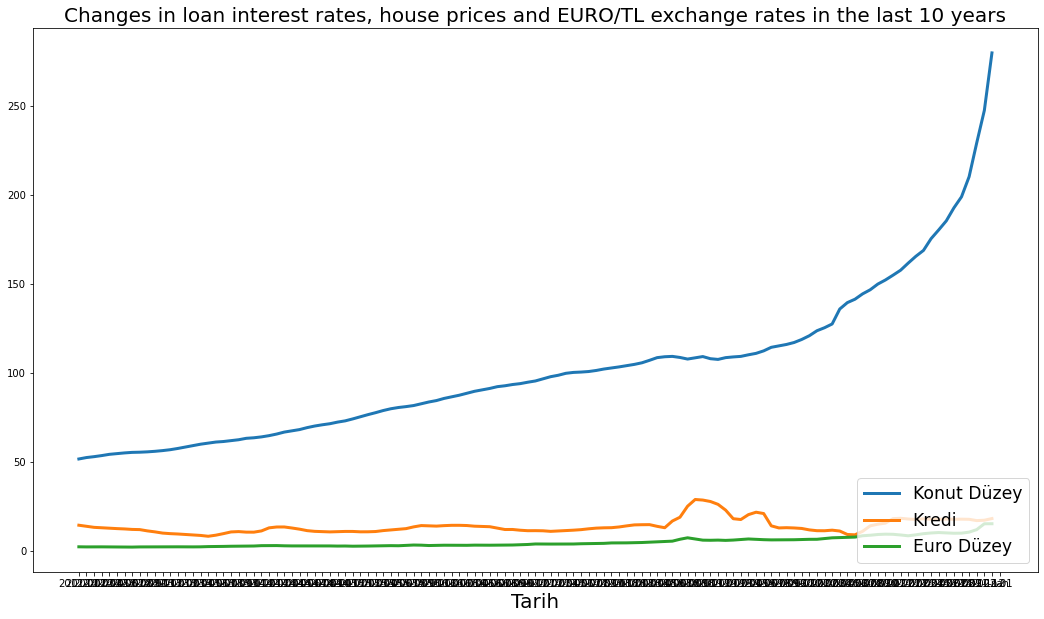

In [8]:
plt.figure( figsize=(18,10) )

date = (merge_df['Tarih']).astype(str)

for i in merge_df.columns.values[1:]:
    plt.plot(date,
            merge_df[i],
            label=i,
            linewidth=3)
    
plt.legend(loc=4,fontsize="xx-large")
plt.title("Changes in loan interest rates, house prices and EURO/TL exchange rates in the last 10 years", fontsize=20)
plt.xlabel("Tarih", fontsize=20)
plt.show()

For further analysis, the change in value of each data field is obtained by dividing the values at t+1 by t and multiplying by 100 to obtain the percent change. Naturally, the first data point is lost. With this percentage change, comparison between data can be made more easily.

In [9]:
konutList = []
krediList = []
euroList = []

for ii in range(0,120):
    konutItem = round((merge_df["Konut Düzey"][ii+1]/merge_df["Konut Düzey"][ii]-1)*100 )
    krediItem = round((merge_df["Kredi"][ii+1]/merge_df["Kredi"][ii]-1)*100 )
    euroItem = round((merge_df["Euro Düzey"][ii+1]/merge_df["Euro Düzey"][ii]-1)*100 )
    
    konutList.insert(ii, konutItem)
    krediList.insert(ii, krediItem)
    euroList.insert(ii, euroItem)

final_df = pd.DataFrame(list(zip(konutList, krediList, euroList)), columns =['Konut %', 'Kredi %', 'Euro %'])
final_df.head()

,Konut %,Kredi %,Euro %
0,2,-4,-2
1,1,-4,2
2,1,-2,0
3,1,-2,-2
4,1,-1,-1


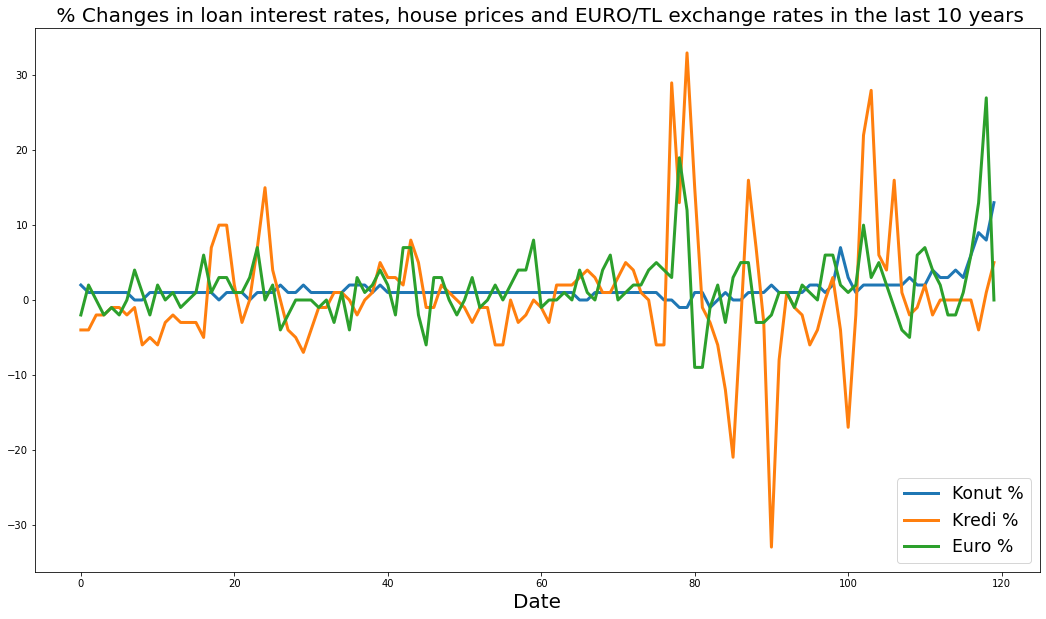

In [10]:
plt.figure( figsize=(18,10) )

for i in final_df.columns.values[0:]:
    plt.plot(final_df[i],
            label=i,
            linewidth=3)
    
plt.legend(loc=4,fontsize="xx-large")
plt.title(" % Changes in loan interest rates, house prices and EURO/TL exchange rates in the last 10 years", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.show()

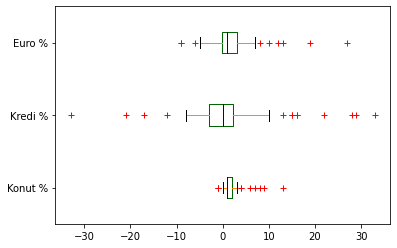

In [11]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Black",
}
final_df.plot.box(vert=False, positions=[1, 2, 3], color=color, sym="r+");

In [13]:
merge_df.corr()

,Konut Düzey,Kredi,Euro Düzey
Konut Düzey,1.000000,0.452477,0.970772
Kredi,0.452477,1.000000,0.524392
Euro Düzey,0.970772,0.524392,1.000000


### Conclusion

As can be seen from the visualized data, there is a significant relationship between foreign exchange increases and decreases and loan rates. With the increase in the foreign exchange rate, the interest rates on the loans also increase and decrease in the same way.

However, the reason for the decrease in the loan interest rate despite the increase in the exchange rate in late 2021 and early 2022 is the special interest rates applied in state banks. In private banks, the situation may be different.

In addition to these, I expected house prices to be directly proportional to the rise and fall of foreign exchange prices, but it was not as I expected. House prices don't seem like a very active sector. However, the radical rise of the euro in the last 2021 and 2022 years seems to have affected house prices as well.